In [320]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('/Users/amahfouz/Downloads/csv_data/2023_01_26/SimData_2023.01.26_09.18.03.csv', low_memory=False)


In [321]:
for c in df.columns:
    sample_values = df[c].dropna().astype(str).sample(5, replace=True)  # Take a sample of non-null
    if pd.to_numeric(sample_values, errors='coerce').notna().all():
        df[c] = pd.to_numeric(df[c], errors='coerce')

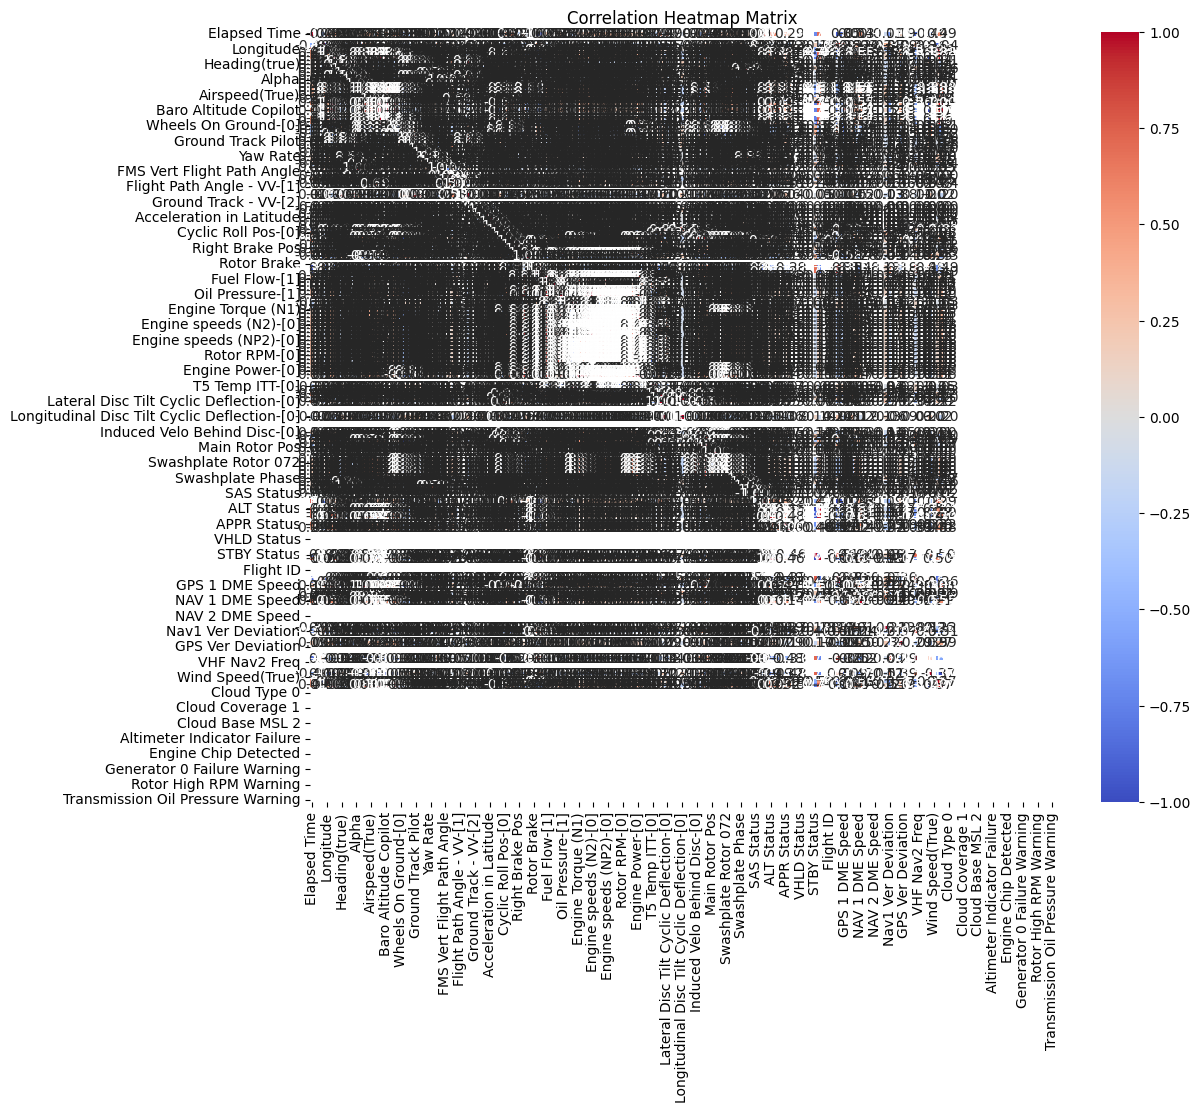

In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap Matrix')
plt.show()


In [176]:
# Calculate correlations
target_columns = ['Vert. Speed', 'Altitude(AGL)', 'Groundspeed']


correlations = df.corr()['Vert. Speed']
# Sort correlations
sorted_correlations = correlations.sort_values(ascending=False)
sorted_correlations

Vert. Speed                          1.000000
Flight Path Angle - VV-[0]           0.677088
Pitch Path                           0.414201
Rotor Torque-[0]                     0.411827
Engine Torque (N2)                   0.333378
                                       ...   
Rotor High RPM Warning                    NaN
Tail Rotor Chip Warning                   NaN
Transmission Chip Warning                 NaN
Transmission Oil Temp Warning             NaN
Transmission Oil Pressure Warning         NaN
Name: Vert. Speed, Length: 201, dtype: float64

In [178]:
correlations = df.corr()['Groundspeed']
# Sort correlations
sorted_correlations = correlations.sort_values(ascending=False)
sorted_correlations

Groundspeed                          1.000000
GPS 1 DME Speed                      0.999998
Airspeed(True)                       0.999835
Airspeed(Ind)                        0.998262
Radio Altitude Copilot               0.810814
                                       ...   
Rotor High RPM Warning                    NaN
Tail Rotor Chip Warning                   NaN
Transmission Chip Warning                 NaN
Transmission Oil Temp Warning             NaN
Transmission Oil Pressure Warning         NaN
Name: Groundspeed, Length: 201, dtype: float64

In [180]:
correlations = df.corr()['Altitude(AGL)']
# Sort correlations
sorted_correlations = correlations.sort_values(ascending=False)
sorted_correlations

Altitude(AGL)                        1.000000
Radio Altitude Copilot               1.000000
Radio Altitude Pilot                 1.000000
Elevation                            0.998798
Altitude(MSL)                        0.998798
                                       ...   
Rotor High RPM Warning                    NaN
Tail Rotor Chip Warning                   NaN
Transmission Chip Warning                 NaN
Transmission Oil Temp Warning             NaN
Transmission Oil Pressure Warning         NaN
Name: Altitude(AGL), Length: 201, dtype: float64

In [164]:
import pandas as pd
import matplotlib.pyplot as plt


# Read the CSV file
file_path = '/Users/amahfouz/Downloads/csv_data/2023_01_26/2023_01_26_all.csv'
df = pd.read_csv(file_path)
df.head()

/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/959027934.py:7: DtypeWarning: Columns (3,145,171) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


,Elapsed Time,Date,System UTC Time,Latitude,Longitude,Altitude(MSL),Altitude(AGL),Heading(mag),Heading(true),Pitch,...,Fuel Low Warning,Generator 0 Failure Warning,Generator 1 Failure Warning,Hydraulic System Warning,Rotor Low RPM Warning,Rotor High RPM Warning,Tail Rotor Chip Warning,Transmission Chip Warning,Transmission Oil Temp Warning,Transmission Oil Pressure Warning
0,0.028,01/26/2023,16:10:42.914,39.358996,-74.434699,162.31,0.05,164.885,152.547,-0.392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.047,01/26/2023,16:10:42.933,39.358996,-74.434699,162.31,0.05,164.885,152.547,-0.392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.071,01/26/2023,16:10:42.957,39.358996,-74.434699,162.31,0.05,164.885,152.547,-0.392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.096,01/26/2023,16:10:42.982,39.358996,-74.434699,162.31,0.05,164.885,152.547,-0.392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.119,01/26/2023,16:10:43.005,39.358996,-74.434699,162.31,0.05,164.885,152.547,-0.392,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
# remove types raw and scenario start and scenario end rows
file_path = '/Users/amahfouz/Downloads/csv_data/2023_01_26/SimData_2023.01.26_16.05.57.csv'
df.drop(0, inplace=True)
df.drop(1, inplace=True)
df = df.drop(df.index[-1])
df.tail(10)

KeyError: '[0] not found in axis'

In [122]:
# Convert 'time' column to datetime object
# from datetime import datetime
df['DateTime'] = df['Date'] + ' '+ df['System UTC Time'].astype(str)
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %H:%M:%S.%f')
df['Radio Altitude Pilot']

0         0.049
1         0.049
2         0.049
3         0.049
4         0.049
          ...  
691747    0.167
691748    0.167
691749    0.167
691750    0.167
691751    0.167
Name: Radio Altitude Pilot, Length: 691752, dtype: float64

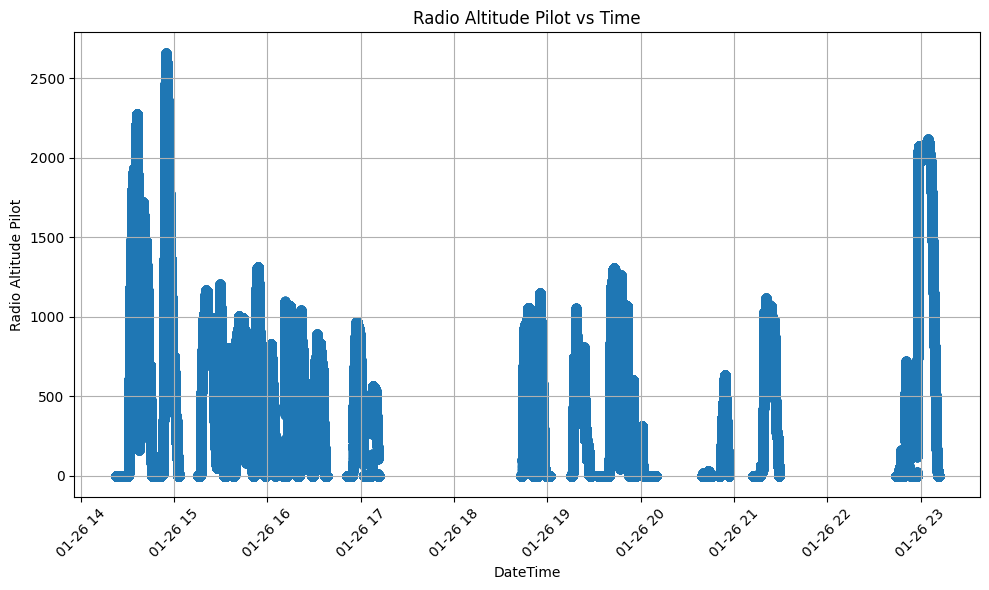

In [50]:
# Plot scatter plot for 'altitude' vs 'time'
plt.figure(figsize=(10, 6))
plt.scatter(df['DateTime'], df['Radio Altitude Pilot'])
plt.xlabel('DateTime')
plt.ylabel('Radio Altitude Pilot')
plt.title('Radio Altitude Pilot vs Time')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
df['hour'] = df['DateTime'].dt.hour

# Group the data by hour
grouped = df.groupby('hour')

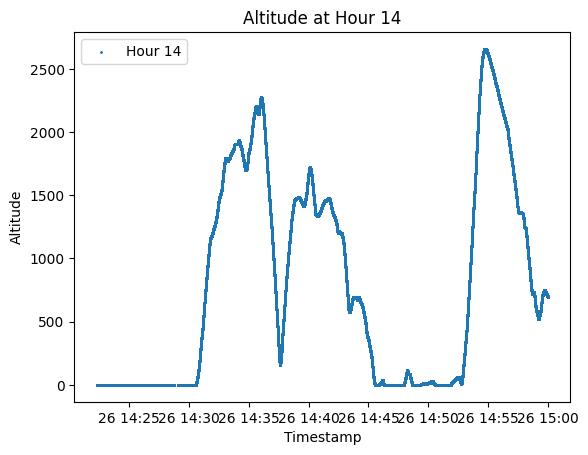

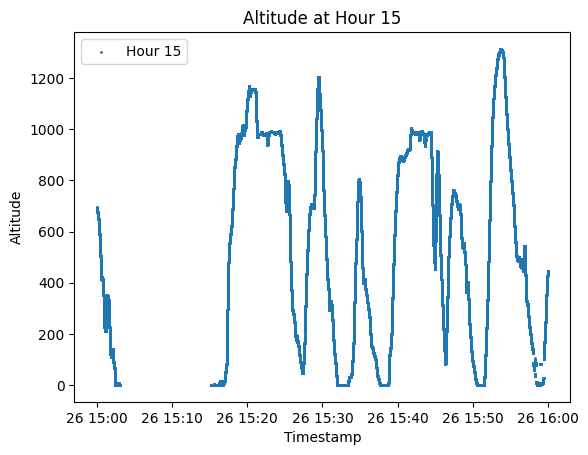

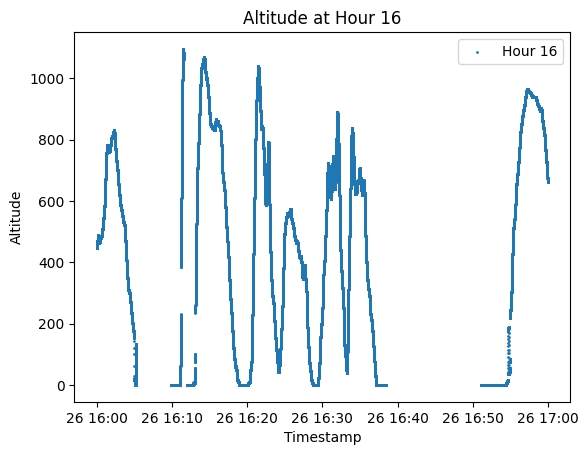

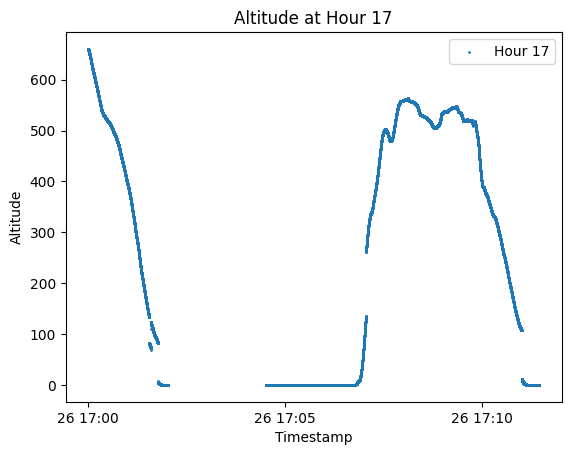

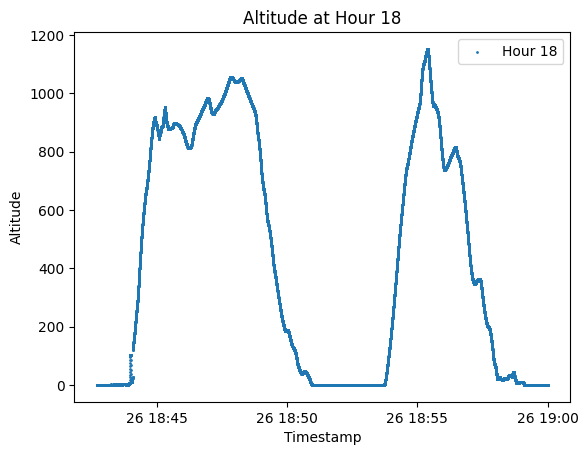

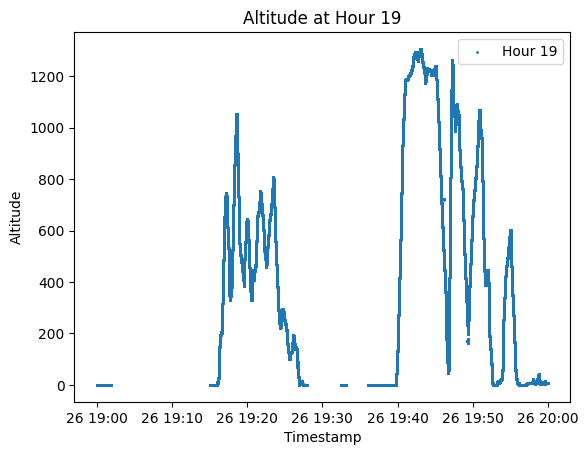

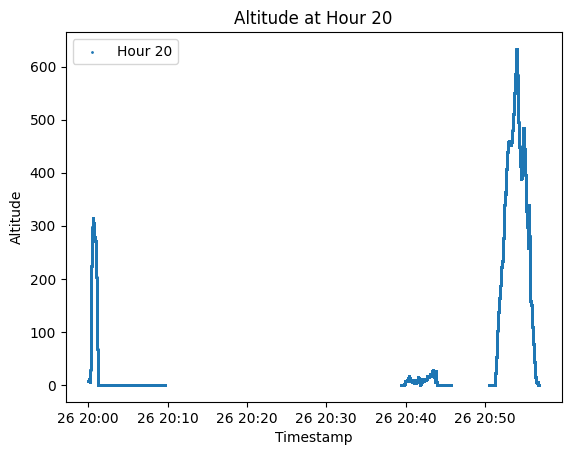

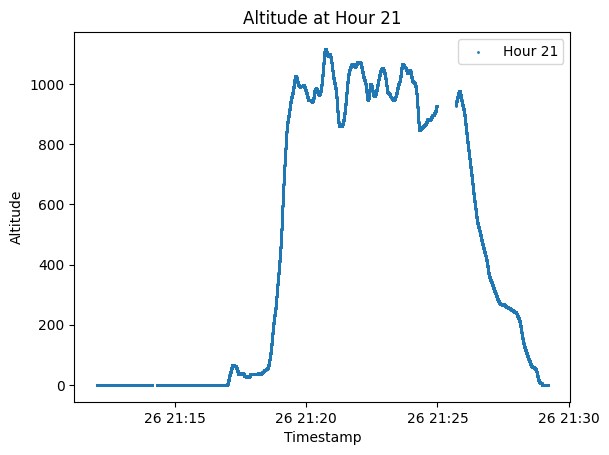

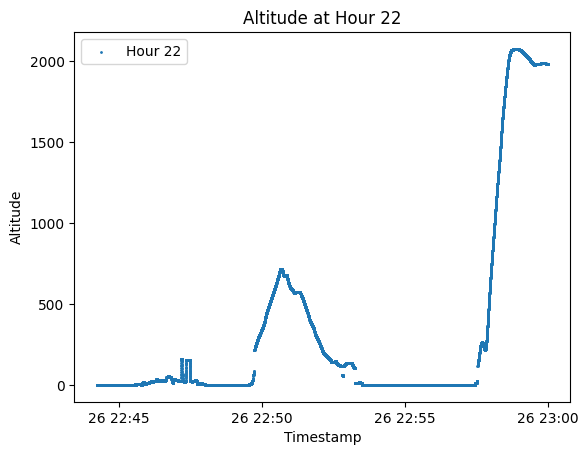

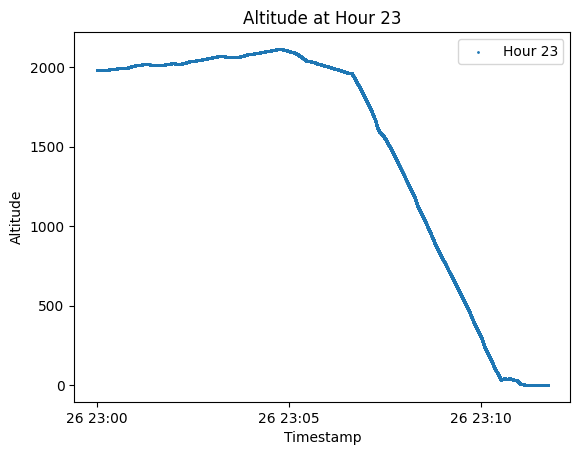

In [87]:
for hour, group in grouped:
    plt.figure()
    plt.scatter(group['DateTime'], group['Radio Altitude Pilot'], label=f'Hour {hour}', s=1)
    plt.xlabel('Timestamp')
    plt.ylabel('Altitude')
    plt.title('Altitude at Hour '+str(hour))
    plt.legend()
    plt.show()


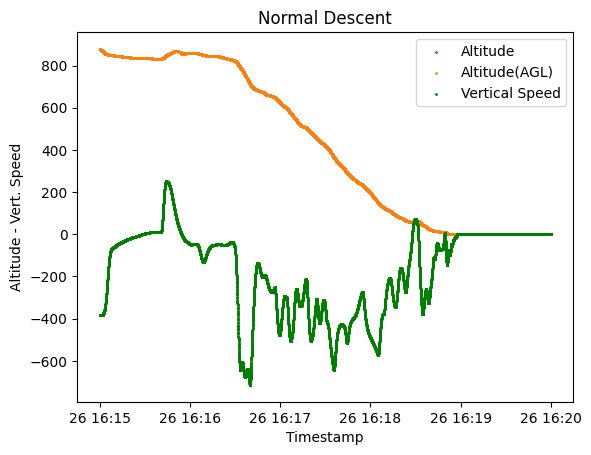

In [113]:
climb_start_time = "01/26/2023 16:15:00.00"
climb_end_time= "01/26/2023 16:20:00.000"

filtered_df = df[(df['DateTime'] >= climb_start_time) & (df['DateTime'] <= climb_end_time)]


plt.figure()
plt.scatter(filtered_df['DateTime'], filtered_df['Radio Altitude Pilot'], label='Altitude', s=1)
plt.scatter(filtered_df['DateTime'], filtered_df['Altitude(AGL)'], label='Altitude(AGL)', s=1)
plt.scatter(filtered_df['DateTime'], filtered_df['Vert. Speed'], color='green', label='Vertical Speed', s=1)

plt.xlabel('Timestamp')
plt.ylabel('Altitude - Vert. Speed')
plt.title("Normal Descent")
plt.legend()
plt.show()

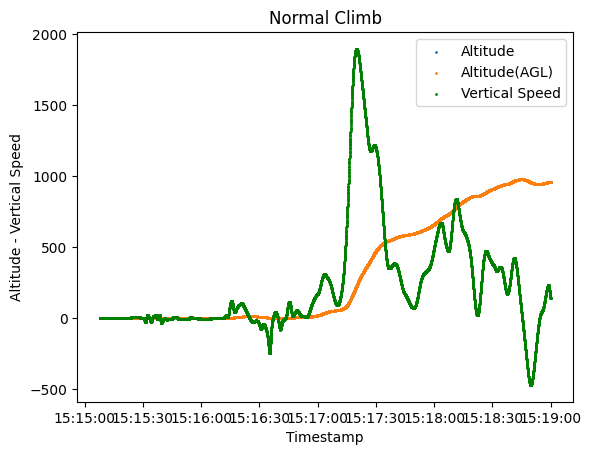

In [114]:
climb_start_time = "01/26/2023 15:15:00.00"
climb_end_time= "01/26/2023 15:19:00.000"

filtered_df = df[(df['DateTime'] >= climb_start_time) & (df['DateTime'] <= climb_end_time)]
plt.figure()

plt.scatter(filtered_df['DateTime'], filtered_df['Radio Altitude Pilot'], label='Altitude', s=1)
plt.scatter(filtered_df['DateTime'], filtered_df['Altitude(AGL)'], label='Altitude(AGL)', s=1)
plt.scatter(filtered_df['DateTime'], filtered_df['Vert. Speed'], color='green', label='Vertical Speed', s=1)

plt.xlabel('Timestamp')
plt.ylabel('Altitude - Vertical Speed')
plt.title("Normal Climb")
plt.legend()
plt.show()



In [132]:
from sklearn.cluster import KMeans
string_columns = df.select_dtypes(include=['object']).columns

no_strings_df = df.drop(columns=string_columns).drop(columns=['DateTime']).fillna(0)
no_strings_df.replace([np.inf, -np.inf], 0, inplace=True)
data = no_strings_df.values
no_strings_df.head()

,Elapsed Time,Longitude,Altitude(MSL),Altitude(AGL),Heading(mag),Heading(true),Pitch,Roll,Yaw,Alpha,...,Fuel Low Warning,Generator 0 Failure Warning,Generator 1 Failure Warning,Hydraulic System Warning,Rotor Low RPM Warning,Rotor High RPM Warning,Tail Rotor Chip Warning,Transmission Chip Warning,Transmission Oil Temp Warning,Transmission Oil Pressure Warning
0,0.028,-74.434699,162.31,0.05,164.885,152.547,-0.392,-0.273,152.189,0.003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.047,-74.434699,162.31,0.05,164.885,152.547,-0.392,-0.273,152.189,0.002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.071,-74.434699,162.31,0.05,164.885,152.547,-0.392,-0.273,152.189,0.002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.096,-74.434699,162.31,0.05,164.885,152.547,-0.392,-0.273,152.189,0.002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.119,-74.434699,162.31,0.05,164.885,152.547,-0.392,-0.273,152.189,0.001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [271]:
def find_number_of_clusters(data):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(data)
        wcss.append(kmeans.inertia_)

    # Plot the elbow graph
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')  # Within-cluster sum of squares
    plt.show()

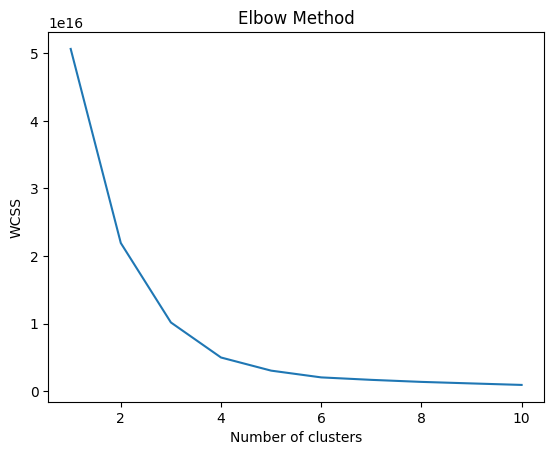

In [133]:
# find_number_of_clusters(data)

In [286]:
def cluster_data(data, number_of_clusters):
    kmeans = KMeans(n_clusters=number_of_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit_predict(data)
    return kmeans

In [145]:
kmeans = cluster_data(data, 4)

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [290]:
def plot_clusters(kmeans):
    plt.figure()
    plt.scatter(df["Altitude(AGL)"], df['Groundspeed'], s=0.5, color='black')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
    plt.title('Clustered Data')
    plt.xlabel('Altitude')
    plt.ylabel('Vert. Speed')
    plt.show()

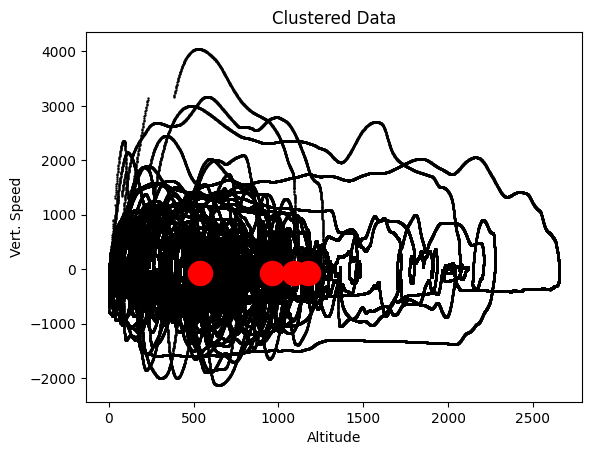

In [163]:
plot_clusters(kmeans)

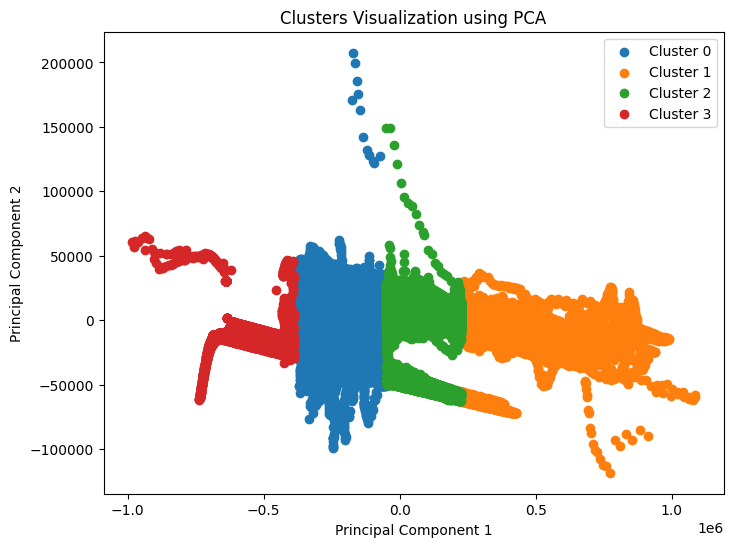

In [146]:
from sklearn.decomposition import PCA

# Reduce dimensionality using PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data)

# Create a DataFrame with PCA results and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = cluster_labels

# Visualize clusters in 2D
plt.figure(figsize=(8, 6))
for cluster in range(4):
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [147]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(data)

# Create a DataFrame with t-SNE results and cluster labels
tsne_df = pd.DataFrame(data=tsne_result, columns=['Dimension 1', 'Dimension 2'])
tsne_df['Cluster'] = cluster_labels

# Visualize clusters in 2D using t-SNE
plt.figure(figsize=(8, 6))
for cluster in range(4):
    cluster_data = tsne_df[tsne_df['Cluster'] == cluster]
    plt.scatter(cluster_data['Dimension 1'], cluster_data['Dimension 2'], label=f'Cluster {cluster}')

plt.title('Clusters Visualization using t-SNE')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.legend()
plt.show()

KeyboardInterrupt: 

In [337]:
high_alt_df = df[df["Altitude(AGL)"]>100]
low_alt_df = df[df["Altitude(AGL)"]<=100]
def identify_phase1(vertical_speed, ground_speed, altitude):
    if vertical_speed > 90 and altitude >= 100:
        return "Climb"
    elif vertical_speed < -90 and altitude >= 100:
        return "Descent"
    elif -90 <= vertical_speed <= 90 and ground_speed > 0.6 and altitude >= 100:
        return "Cruise"
    elif -90 <= vertical_speed <= 90 and ground_speed < 0.6 and altitude > 2:
        return "Hover"
    elif ground_speed < 0.6 and altitude in range(0, 2):
        return "Standing"
    elif 0.6 <= ground_speed < 18 and altitude in range(0, 2):
        return "Surface Taxi"
    elif 0.6 <= ground_speed < 18 and 2 <= altitude < 25:
        return "Hover Taxi"
    elif 0.6 <= ground_speed < 18 and 25 <= altitude < 100:
        return "Air Taxi"
    else:
        return "Unknown Phase"

def is_close_to_zero(number, tolerance=1):
    return abs(number) <=tolerance

def identify_phase(vertical_speed, ground_speed, altitude):
    if is_close_to_zero(vertical_speed) and ground_speed < 0.6 and 0 <= altitude < 2:
        return "Standing"
    elif is_close_to_zero(vertical_speed) and 0.6 <= ground_speed < 20 and 0 <= altitude < 2:
        return "Surface Taxi"
    elif is_close_to_zero(vertical_speed) and 0.6 <= ground_speed < 30 and 2 <= altitude < 25:
        return "Hover Taxi"
    elif is_close_to_zero(vertical_speed) and 0.6 <= ground_speed < 50 and 25 <= altitude < 100:
        return "Air Taxi"
    elif -90 <= vertical_speed <= 90 and ground_speed <= 0.6 and altitude < 2:
        return "Hover In Ground Effect"
    elif -90 <= vertical_speed <= 90 and ground_speed <= 0.6 and altitude >= 100:
        return "Hover"
    elif vertical_speed > 90 and ground_speed <= 0.6 and altitude < 100:
        return "Hover Lift"
    elif vertical_speed < -90 and ground_speed <= 0.6 and altitude < 100:
        return "Hover Descent"
    elif vertical_speed > 90 and altitude >= 100:
        return "Climb"
    elif -90 <= vertical_speed <= 90 and ground_speed > 0.6 and altitude >= 100:
        return "Cruise"
    elif vertical_speed < -90 and altitude >= 100:
        return "Descent"
    else:
        return "Unknown Phase"


In [338]:
high_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)
high_alt_df["phase"].value_counts()

/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/3353146022.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)


phase
Descent    33216
Climb      26588
Cruise      6263
Name: count, dtype: int64

In [339]:
low_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)
low_alt_df["phase"].value_counts()

/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/843019058.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_alt_df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)


phase
Standing                  28896
Unknown Phase             14819
Hover In Ground Effect     2985
Surface Taxi               1156
Hover Lift                   36
Hover Taxi                   19
Air Taxi                     12
Name: count, dtype: int64

/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/1916102632.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_phase['DateTime'] = unknown_phase['Date'] + ' '+ unknown_phase['System UTC Time'].astype(str)
/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/1916102632.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unknown_phase['DateTime'] = pd.to_datetime(unknown_phase['DateTime'], format='%m/%d/%Y %H:%M:%S.%f')


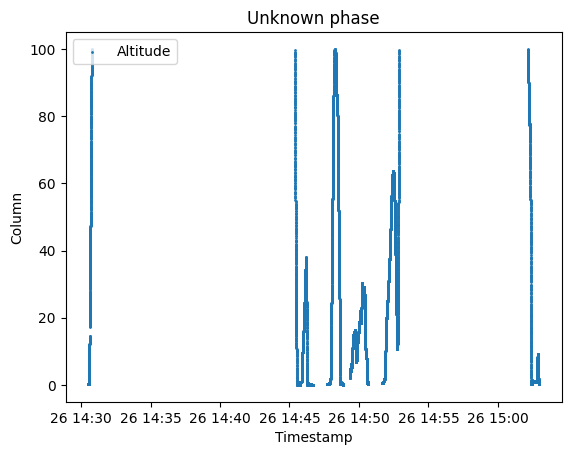

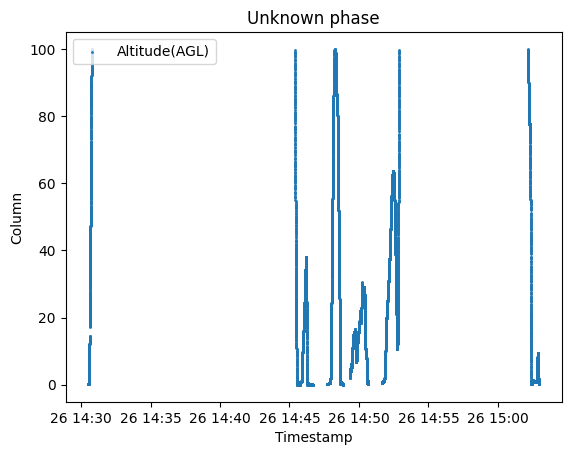

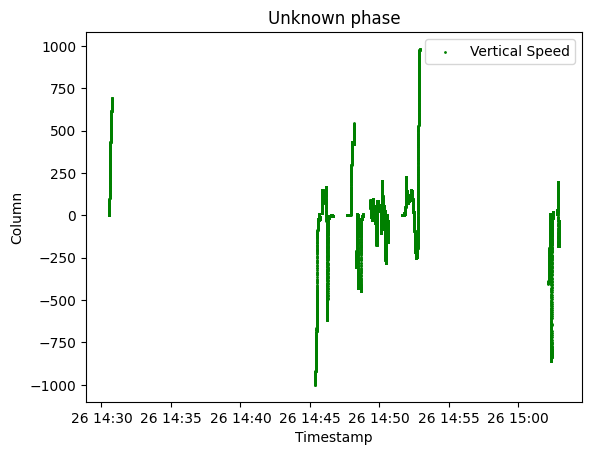

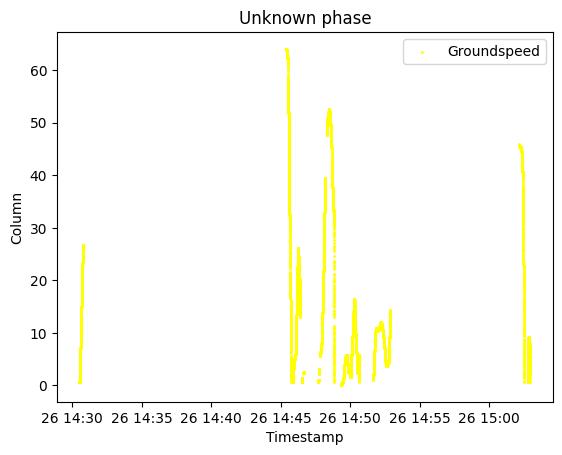

In [340]:
unknown_phase = low_alt_df[low_alt_df['phase']=='Unknown Phase']

unknown_phase['DateTime'] = unknown_phase['Date'] + ' '+ unknown_phase['System UTC Time'].astype(str)
unknown_phase['DateTime'] = pd.to_datetime(unknown_phase['DateTime'], format='%m/%d/%Y %H:%M:%S.%f')

plt.figure()
plt.scatter(unknown_phase['DateTime'], unknown_phase['Radio Altitude Pilot'], label='Altitude', s=1)
plt.xlabel('Timestamp')
plt.ylabel('Column')
plt.title("Unknown phase")
plt.legend()
plt.show()

plt.figure()
plt.scatter(unknown_phase['DateTime'], unknown_phase['Altitude(AGL)'], label='Altitude(AGL)', s=1)
plt.xlabel('Timestamp')
plt.ylabel('Column')
plt.title("Unknown phase")
plt.legend()
plt.show()

plt.figure()
plt.scatter(unknown_phase['DateTime'], unknown_phase['Vert. Speed'], color='green', label='Vertical Speed', s=1)
plt.xlabel('Timestamp')
plt.ylabel('Column')
plt.title("Unknown phase")
plt.legend()
plt.show()

plt.figure()
plt.scatter(unknown_phase['DateTime'], unknown_phase['Groundspeed'], color='yellow', label='Groundspeed', s=1)
plt.xlabel('Timestamp')
plt.ylabel('Column')
plt.title("Unknown phase")
plt.legend()
plt.show()


In [326]:
low_alt_df[low_alt_df["phase"]=="Standing"]["Vert. Speed"].describe()
# low_alt_df[low_alt_df["phase"]=="Surface Taxi"]["Vert. Speed"].describe()
# low_alt_df[low_alt_df["phase"]=="Hover Taxi"]["Vert. Speed"].describe()
# low_alt_df[low_alt_df["phase"]=="Air Taxi"]["Vert. Speed"].describe()

count    28896.000000
mean         0.028486
std          0.154382
min         -0.996000
25%         -0.000000
50%          0.000000
75%          0.001000
max          0.998000
Name: Vert. Speed, dtype: float64

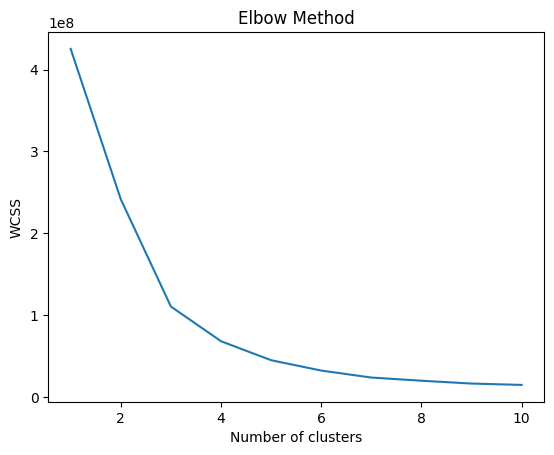

In [292]:
find_number_of_clusters(unknown_phase[["Altitude(AGL)","Vert. Speed"]])


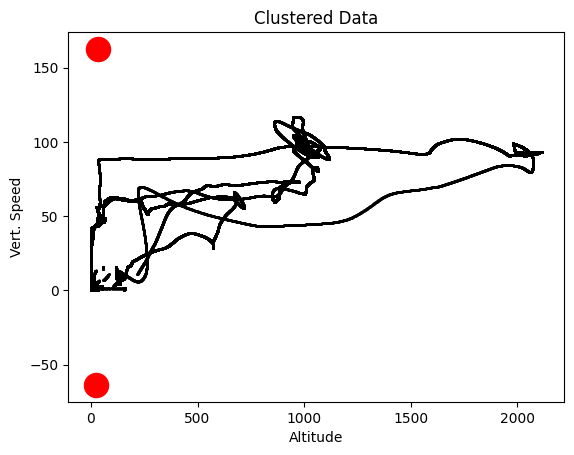

In [294]:
kmeans = cluster_data(unknown_phase[["Altitude(AGL)","Vert. Speed"]], 2)
plot_clusters(kmeans)

/var/folders/23/thv06wgd00j6tfbg1sr_s4mc0000gn/T/ipykernel_24265/2978358031.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)


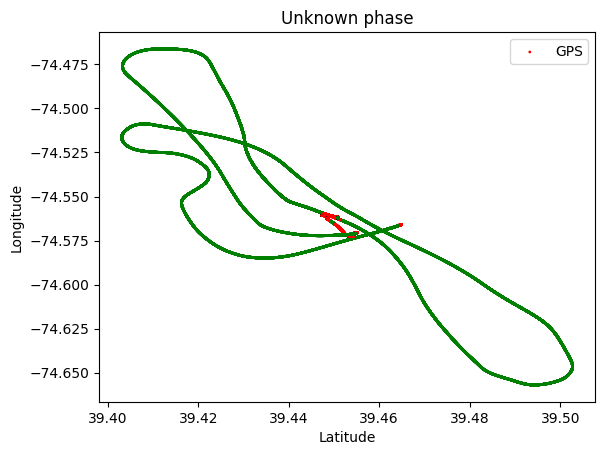

In [327]:
df["phase"] = df.apply(lambda row: identify_phase(row['Vert. Speed'], row['Groundspeed'], row['Altitude(AGL)']), axis=1)

def color_phase(phase):
    if phase == "Unknown Phase":
        return 'red'
    else:
        return 'green'
# Create an array of colors based on the 'status' column
colors = df['phase'].map(color_phase)

plt.figure()
plt.scatter(df['Latitude'], df['Longitude'], c=colors, label='GPS', s=1)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Unknown phase")
plt.legend()
plt.show()


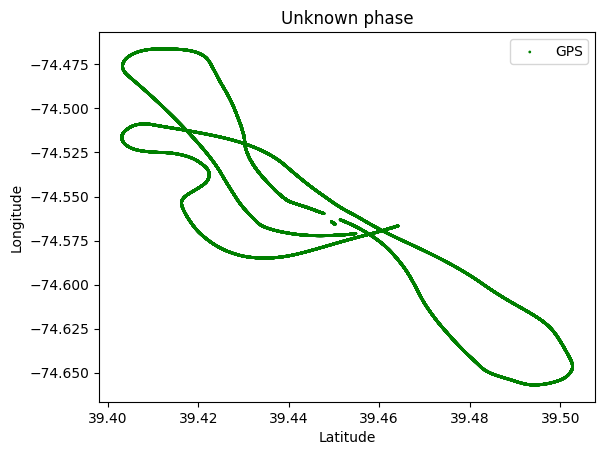

In [328]:
colors = high_alt_df['phase'].map(color_phase)
plt.figure()
plt.scatter(high_alt_df['Latitude'], high_alt_df['Longitude'], c=colors, label='GPS', s=1)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title("Unknown phase")
plt.legend()
plt.show()

In [341]:
unknown_phase

,Elapsed Time,Date,System UTC Time,Latitude,Longitude,Altitude(MSL),Altitude(AGL),Heading(mag),Heading(true),Pitch,...,Generator 1 Failure Warning,Hydraulic System Warning,Rotor Low RPM Warning,Rotor High RPM Warning,Tail Rotor Chip Warning,Transmission Chip Warning,Transmission Oil Temp Warning,Transmission Oil Pressure Warning,phase,DateTime
23580,476.036,01/26/2023,14:30:30.625,39.464849,-74.565965,57.83,0.31,219.974,207.673,0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown Phase,2023-01-26 14:30:30.625
23581,476.054,01/26/2023,14:30:30.643,39.464849,-74.565965,57.83,0.31,219.977,207.677,0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown Phase,2023-01-26 14:30:30.643
23582,476.074,01/26/2023,14:30:30.663,39.464849,-74.565965,57.83,0.31,219.980,207.680,0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown Phase,2023-01-26 14:30:30.663
23583,476.095,01/26/2023,14:30:30.684,39.464849,-74.565965,57.83,0.31,219.984,207.684,0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown Phase,2023-01-26 14:30:30.684
23584,476.113,01/26/2023,14:30:30.702,39.464849,-74.565965,57.83,0.32,219.989,207.688,0.032,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown Phase,2023-01-26 14:30:30.702
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113589,2423.414,01/26/2023,15:02:58.003,39.450844,-74.562159,61.21,0.23,314.218,301.918,-0.278,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown Phase,2023-01-26 15:02:58.003
113590,2423.435,01/26/2023,15:02:58.024,39.450844,-74.562160,61.19,0.22,314.245,301.946,-0.277,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown Phase,2023-01-26 15:02:58.024
113591,2423.457,01/26/2023,15:02:58.045,39.450844,-74.562160,61.18,0.21,314.284,301.984,-0.282,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown Phase,2023-01-26 15:02:58.045
113592,2423.487,01/26/2023,15:02:58.075,39.450844,-74.562160,61.16,0.19,314.361,302.061,-0.304,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Unknown Phase,2023-01-26 15:02:58.075


In [334]:
# Convert 'time' column to datetime object
# from datetime import datetime
df.drop(0, inplace=True)
df.drop(1, inplace=True)
df = df.drop(df.index[-1])
df['DateTime'] = df['Date'] + ' '+ df['System UTC Time'].astype(str)
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%m/%d/%Y %H:%M:%S.%f')

KeyError: '[0] not found in axis'

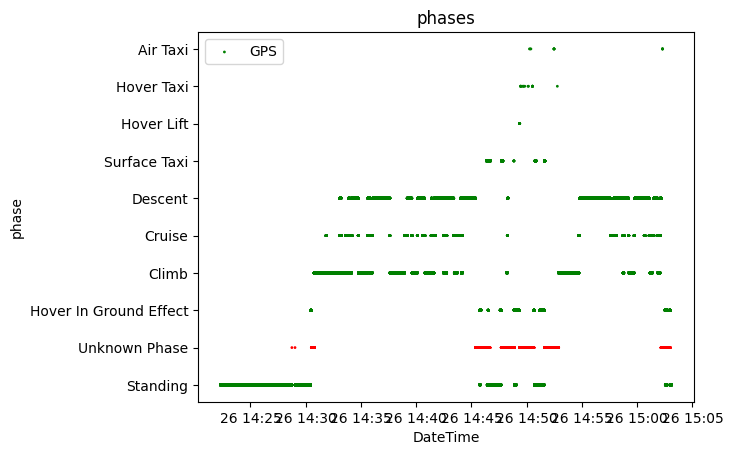

In [335]:
def color_phase(phase):
    if phase == "Unknown Phase":
        return 'red'
    else:
        return 'green'
# Create an array of colors based on the 'status' column
colors = df['phase'].map(color_phase)

plt.figure()
plt.scatter(df['DateTime'], df['phase'], c=colors, label='GPS', s=1)
plt.xlabel('DateTime')
plt.ylabel('phase')
plt.title("phases")
plt.legend()
plt.show()

In [369]:
df['hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute
df["hourMinute"] = df["hour"].astype(str)+':'+df["minute"].astype(str)

df[df["phase"]=="Unknown Phase"]["hourMinute"].unique()


array(['14:28', '14:29', '14:30', '14:45', '14:46', '14:47', '14:48',
       '14:49', '14:50', '14:51', '14:52', '15:2'], dtype=object)